In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import types

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
healthexp_data = pd.read_excel('SIRP3.xlsx')
healthexp_data.head()

,Country Name,Country Code,Region,Income_Group,Year,Current health expenditure (% of GDP),GDP per capita (current US$),Domestic general government health expenditure (% of general government expenditure),Current health expenditure per capita (current US$),GDP per capita (constant 2010 US$),"Population, total","Life expectancy at birth, total (years)"
0,Afghanistan,AFG,South Asia,Low income,2000,NaN,NaN,NaN,NaN,NaN,20779953.0,55.841
1,Albania,ALB,Europe & Central Asia,Upper middle income,2000,NaN,1126.683318,8.048539,NaN,2244.624632,3089027.0,73.955
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2000,3.489033,1764.973830,8.788068,61.302891,3557.638668,31042235.0,70.640
3,Andorra,AND,Europe & Central Asia,High income: nonOECD,2000,9.348101,21854.246800,12.992445,2050.647461,40379.390210,65390.0,NaN
4,Angola,AGO,Sub-Saharan Africa,Upper middle income,2000,1.908599,556.836318,2.738583,12.963032,2195.631044,16395473.0,46.522


In [19]:
print(healthexp_data.shape)

(1140, 12)


In [20]:
healthexp_data = healthexp_data.drop('Year', axis = 1)
healthexp_data = healthexp_data.drop('Country Code', axis = 1)
print(healthexp_data.shape)

(1140, 10)


In [21]:
healthexp_data.columns

Index(['Country Name', 'Region', 'Income_Group',
       'Current health expenditure (% of GDP)', 'GDP per capita (current US$)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Current health expenditure per capita (current US$)',
       'GDP per capita (constant 2010 US$)', 'Population, total',
       'Life expectancy at birth, total (years)'],
      dtype='object')

In [23]:
income = pd.get_dummies(healthexp_data.Income_Group)
healthexp_data = pd.concat([healthexp_data, income], axis = 1)
healthexp_data = healthexp_data.drop(['Income_Group'], axis=1)
healthexp_data.rename(columns = {'High income: nonOECD' : '1', 'High income: OECD' : '2', 'Low income': '3', 'Lower middle income': '4','Upper middle income': '5'})

,Country Name,Current health expenditure (% of GDP),GDP per capita (current US$),Domestic general government health expenditure (% of general government expenditure),Current health expenditure per capita (current US$),GDP per capita (constant 2010 US$),"Population, total","Life expectancy at birth, total (years)",East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,2,1,3,4,5
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,20779953.0,55.841,0,0,0,0,0,1,0,0,0,1,0,0
1,Albania,NaN,1126.683318,8.048539,NaN,2244.624632,3089027.0,73.955,0,1,0,0,0,0,0,0,0,0,0,1
2,Algeria,3.489033,1764.973830,8.788068,61.302891,3557.638668,31042235.0,70.640,0,0,0,1,0,0,0,0,0,0,0,1
3,Andorra,9.348101,21854.246800,12.992445,2050.647461,40379.390210,65390.0,NaN,0,1,0,0,0,0,0,0,1,0,0,0
4,Angola,1.908599,556.836318,2.738583,12.963032,2195.631044,16395473.0,46.522,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Venezuela (Boliv. Rep. of),1.181210,NaN,1.370837,94.229378,NaN,29390409.0,72.246,0,0,1,0,0,0,0,0,1,0,0,0
1136,Vietnam,5.532128,2365.621666,9.475599,129.575958,1852.963037,94596642.0,75.241,1,0,0,0,0,0,0,0,0,0,1,0
1137,Yemen,NaN,882.395759,NaN,NaN,643.164002,27834821.0,66.086,0,0,0,1,0,0,0,0,0,0,1,0
1138,Zambia,4.470341,1534.865371,6.856654,67.648666,1660.761145,16853688.0,63.043,0,0,0,0,0,0,1,0,0,0,1,0


In [22]:
region = pd.get_dummies(healthexp_data.Region)
healthexp_data = pd.concat([healthexp_data, region], axis = 1)
healthexp_data = healthexp_data.drop(['Region'], axis=1)
healthexp_data.rename(columns = {'South Asia' : '1', 'Europe & Central Asia' : '2', 'Middle East & North Africa': '3', 'Sub-Saharan Africa': '4','Latin America & Caribbean': '5', 'East Asia & Pacific': '6', 'North America': '7'})

,Country Name,Income_Group,Current health expenditure (% of GDP),GDP per capita (current US$),Domestic general government health expenditure (% of general government expenditure),Current health expenditure per capita (current US$),GDP per capita (constant 2010 US$),"Population, total","Life expectancy at birth, total (years)",6,2,5,3,7,1,4
0,Afghanistan,Low income,NaN,NaN,NaN,NaN,NaN,20779953.0,55.841,0,0,0,0,0,1,0
1,Albania,Upper middle income,NaN,1126.683318,8.048539,NaN,2244.624632,3089027.0,73.955,0,1,0,0,0,0,0
2,Algeria,Upper middle income,3.489033,1764.973830,8.788068,61.302891,3557.638668,31042235.0,70.640,0,0,0,1,0,0,0
3,Andorra,High income: nonOECD,9.348101,21854.246800,12.992445,2050.647461,40379.390210,65390.0,NaN,0,1,0,0,0,0,0
4,Angola,Upper middle income,1.908599,556.836318,2.738583,12.963032,2195.631044,16395473.0,46.522,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Venezuela (Boliv. Rep. of),High income: nonOECD,1.181210,NaN,1.370837,94.229378,NaN,29390409.0,72.246,0,0,1,0,0,0,0
1136,Vietnam,Lower middle income,5.532128,2365.621666,9.475599,129.575958,1852.963037,94596642.0,75.241,1,0,0,0,0,0,0
1137,Yemen,Lower middle income,NaN,882.395759,NaN,NaN,643.164002,27834821.0,66.086,0,0,0,1,0,0,0
1138,Zambia,Lower middle income,4.470341,1534.865371,6.856654,67.648666,1660.761145,16853688.0,63.043,0,0,0,0,0,0,1


In [24]:
healthexp_data.columns

Index(['Country Name', 'Current health expenditure (% of GDP)',
       'GDP per capita (current US$)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Current health expenditure per capita (current US$)',
       'GDP per capita (constant 2010 US$)', 'Population, total',
       'Life expectancy at birth, total (years)', 'East Asia & Pacific',
       'Europe & Central Asia', 'Latin America & Caribbean',
       'Middle East & North Africa', 'North America', 'South Asia',
       'Sub-Saharan Africa', 'High income: OECD', 'High income: nonOECD',
       'Low income', 'Lower middle income', 'Upper middle income'],
      dtype='object')

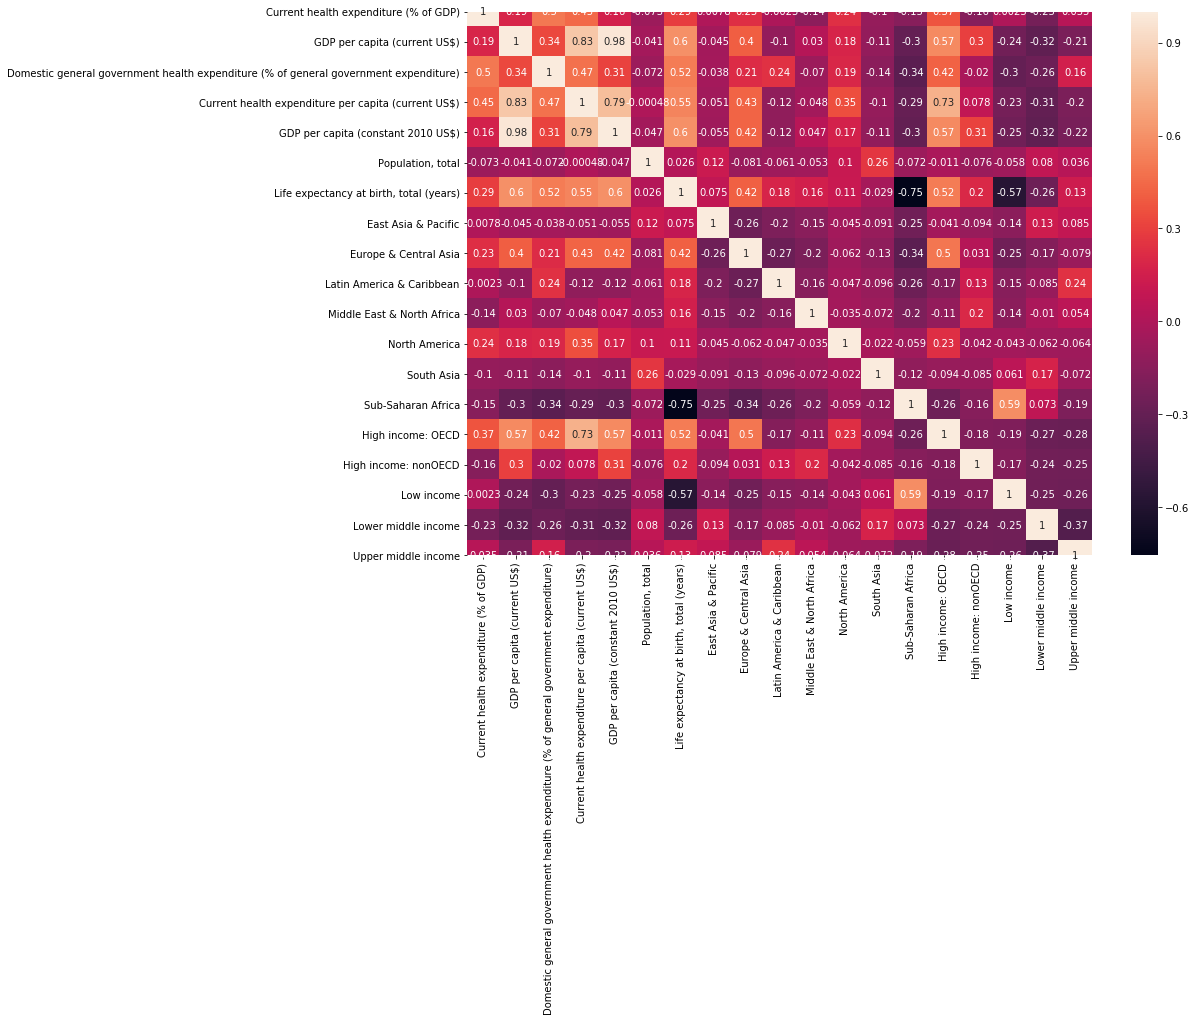

In [25]:
plt.figure(figsize = (14, 10))
sns.heatmap(healthexp_data.corr(), annot = True)

#### Imputing Missing Values

In [43]:
healthexp_data.fillna(value = healthexp_data.mean(), inplace = True)

In [44]:
healthexp_data.head()

,Country Name,Current health expenditure (% of GDP),GDP per capita (current US$),Domestic general government health expenditure (% of general government expenditure),Current health expenditure per capita (current US$),GDP per capita (constant 2010 US$),"Population, total","Life expectancy at birth, total (years)",East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,High income: OECD,High income: nonOECD,Low income,Lower middle income,Upper middle income
0,Afghanistan,6.378905,12153.006301,9.805373,883.562968,13732.499646,20779953.0,55.841000,0,0,0,0,0,1,0,0,0,1,0,0
1,Albania,6.378905,1126.683318,8.048539,883.562968,2244.624632,3089027.0,73.955000,0,1,0,0,0,0,0,0,0,0,0,1
2,Algeria,3.489033,1764.973830,8.788068,61.302891,3557.638668,31042235.0,70.640000,0,0,0,1,0,0,0,0,0,0,0,1
3,Andorra,9.348101,21854.246800,12.992445,2050.647461,40379.390210,65390.0,69.837547,0,1,0,0,0,0,0,0,1,0,0,0
4,Angola,1.908599,556.836318,2.738583,12.963032,2195.631044,16395473.0,46.522000,0,0,0,0,0,0,1,0,0,0,0,1


In [45]:
healthexp_data.isnull().sum()

Country Name                                                                            0
Current health expenditure (% of GDP)                                                   0
GDP per capita (current US$)                                                            0
Domestic general government health expenditure (% of general government expenditure)    0
Current health expenditure per capita (current US$)                                     0
GDP per capita (constant 2010 US$)                                                      0
Population, total                                                                       0
Life expectancy at birth, total (years)                                                 0
East Asia & Pacific                                                                     0
Europe & Central Asia                                                                   0
Latin America & Caribbean                                                               0
Middle Eas

#### Test and Train Data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = healthexp_data.drop(['Country Name', 'Life expectancy at birth, total (years)'], axis = 1)

In [48]:
Y = healthexp_data['Life expectancy at birth, total (years)']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

#### Linear Regression

In [50]:

lreg = LinearRegression()

In [52]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lpred = lreg.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
print(mean_squared_error(Y_test, lpred)**(0.5))

3.937219779560764


In [56]:
print('Training accuracy:', lreg.score(X_train, Y_train))
print('Testing accuracy:', lreg.score(X_test, Y_test))

Training accuracy: 0.7540769209619393
Testing accuracy: 0.7330335410729036


#### Random Forest

In [57]:

from sklearn.metrics import r2_score

In [58]:
lscore = r2_score(Y_test, lpred)

In [59]:
lscore

0.7330335410729037

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators = 60)

In [62]:
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
rpred = rf.predict(X_test)

In [64]:
print(mean_squared_error(Y_test, rpred)**(0.5))

2.3157801207889634


In [65]:
print('Training accuracy:', rf.score(X_train, Y_train))
print('Testing accuracy:', rf.score(X_test, Y_test))

Training accuracy: 0.9840629219002033
Testing accuracy: 0.9076425299859037


In [66]:
rscore = r2_score(Y_test, rpred)
rscore

0.9076425299859037

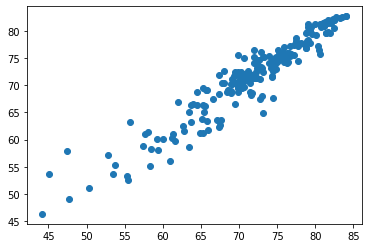

In [67]:
plt.scatter(Y_test, rpred)